# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [1]:
!pip install -q "dask[distributed]" --upgrade 
!pip install -q dask[dataframe]
!pip install -q scipy

In [7]:
import dask.dataframe as dd

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [8]:
from dask.distributed import Client
client = Client()

x:\big_geo_data\mongodb_env\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 5976 instead
  f"Port {expected} is already in use.\n"


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [69]:
ddf=dd.read_csv("EDA_iris.csv", names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
ddf.head(10)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [70]:
ddf=ddf.set_index('species')
ddf.head()

,sepal length,sepal width,petal length,petal width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [71]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, sepal length to petal width
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [72]:
x=ddf.describe()
x.compute()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [73]:
full_ddf=ddf.compute()
sliced_dask_df = full_ddf.iloc[3:7]
print(sliced_dask_df)

             sepal length  sepal width  petal length  petal width
species                                                          
Iris-setosa           4.6          3.1           1.5          0.2
Iris-setosa           5.0          3.6           1.4          0.2
Iris-setosa           5.4          3.9           1.7          0.4
Iris-setosa           4.6          3.4           1.4          0.3


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [75]:
#The mean and quantiles of the dataframe
x=ddf.describe()
x.compute()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
# The variance of the dataset.
var=ddf.var()
var.compute()

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

AttributeError: 'Rectangle' object has no property 'nbins'

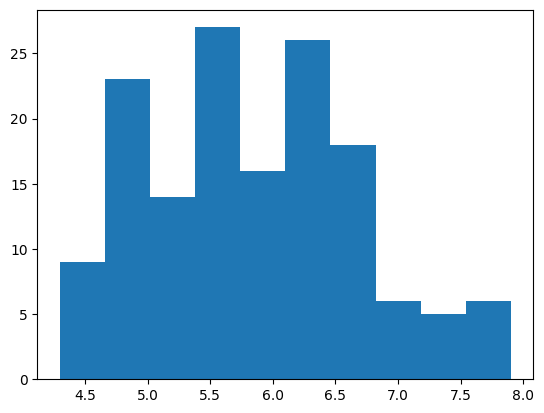

In [91]:
ddf['sepal length'].compute().hist(nbins=10)
ddf['sepal length'].compute().plot.kde(bw_method=0.3)

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.